In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("./Mall_Customers.csv")

In [3]:
df.shape

(200, 5)

In [4]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
df.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [7]:
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


In [11]:
df.drop("CustomerID", axis=1, inplace=True)

In [13]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
df["Gender"] = enc.fit_transform(df["Gender"])

In [16]:
enc.classes_

array(['Female', 'Male'], dtype=object)

In [25]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


In [20]:
gender_mappings = {index: label for index, label in enumerate(enc.classes_)}
gender_mappings

{0: 'Female', 1: 'Male'}

In [21]:
from sklearn.preprocessing import StandardScaler

In [22]:
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

In [23]:
df_scaled.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1.128152,-1.424569,-1.738999,-0.434801
1,1.128152,-1.281035,-1.738999,1.195704
2,-0.886405,-1.352802,-1.700830,-1.715913
3,-0.886405,-1.137502,-1.700830,1.040418
4,-0.886405,-0.563369,-1.662660,-0.395980


In [26]:
from sklearn.cluster import KMeans

In [33]:
clusters = 100

In [34]:
kmeans_tests = [KMeans(n_clusters=i, n_init=10) for i in range(1, clusters)]
inertias = [kmeans_tests[i].fit(df_scaled).inertia_ for i in range(len(kmeans_tests))]

c:\Users\divyansh\anaconda3\envs\tensor\lib\site-packages\sklearn\cluster\_kmeans.py:1037: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  "KMeans is known to have a memory leak on Windows "


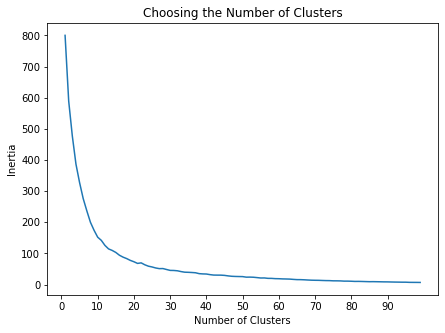

In [42]:
plt.figure(figsize=(7, 5))
plt.plot(range(1, clusters), inertias)
plt.xlabel("Number of Clusters")
plt.xticks(np.arange(0, 99, 10))
plt.ylabel("Inertia")
plt.title("Choosing the Number of Clusters")
plt.show()

In [44]:
model = KMeans(n_clusters=10, n_init=10)
model.fit(df_scaled)

KMeans(n_clusters=10)

In [46]:
clusters = model.predict(df_scaled)
clusters

array([3, 3, 9, 6, 9, 6, 9, 6, 4, 6, 4, 6, 9, 6, 9, 3, 9, 3, 4, 6, 3, 3,
       9, 3, 9, 3, 9, 3, 9, 6, 4, 6, 4, 3, 9, 6, 9, 6, 9, 6, 0, 3, 4, 8,
       9, 6, 0, 8, 8, 8, 0, 3, 8, 4, 0, 4, 0, 4, 8, 4, 4, 3, 0, 0, 4, 3,
       0, 0, 3, 8, 4, 0, 0, 0, 4, 3, 0, 3, 8, 0, 4, 3, 4, 0, 8, 4, 0, 8,
       8, 0, 0, 3, 4, 8, 8, 3, 0, 8, 4, 3, 8, 0, 4, 3, 4, 8, 0, 4, 4, 4,
       4, 8, 8, 3, 8, 8, 0, 0, 0, 0, 3, 8, 8, 7, 8, 1, 2, 7, 4, 7, 2, 7,
       8, 1, 2, 1, 5, 7, 2, 1, 5, 7, 8, 1, 2, 7, 2, 1, 5, 7, 2, 7, 5, 1,
       5, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 5, 7, 2, 7, 2, 7, 5, 1,
       2, 7, 2, 7, 5, 1, 2, 1, 5, 7, 5, 7, 5, 1, 5, 1, 2, 1, 5, 1, 5, 7,
       2, 7])

In [47]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
reduced_data = pd.DataFrame(pca.fit_transform(df_scaled), columns=['PC1', 'PC2'])

In [48]:
reduced_data.head()

,PC1,PC2
0,-0.406383,-0.520714
1,-1.427673,-0.367310
2,0.050761,-1.894068
3,-1.694513,-1.631908
4,-0.313108,-1.810483


In [50]:
model.cluster_centers_

array([[-0.88640526,  1.09830638, -0.24158313, -0.04807901],
       [-0.88640526, -0.47793198,  0.97284787,  1.22158511],
       [ 1.12815215, -0.02700694,  0.96701244, -1.39716754],
       [ 1.12815215, -0.97602698, -0.73705168,  0.41603773],
       [ 1.12815215,  1.43505777, -0.45298304, -0.40195247],
       [-0.88640526,  0.35421988,  1.24912183, -1.14745442],
       [-0.88640526, -0.96084556, -1.33087991,  1.17778643],
       [ 1.12815215, -0.39989994,  1.01344075,  1.26040667],
       [-0.88640526, -0.78153925, -0.12214217, -0.11957041],
       [-0.7425083 ,  0.16967696, -1.31640908, -1.1668652 ]])

In [52]:
new_centers = pca.transform(model.cluster_centers_)
new_centers

c:\Users\divyansh\anaconda3\envs\tensor\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  "X does not have valid feature names, but"


array([[ 0.58233488, -0.85939176],
       [-1.38150389,  0.3644368 ],
       [ 1.19961046,  1.30582744],
       [-0.68838314,  0.28733559],
       [ 1.5303687 ,  0.17028966],
       [ 0.81659377,  0.24505923],
       [-1.6696024 , -1.35294268],
       [-0.88272588,  1.65431318],
       [-0.662429  , -0.58044771],
       [ 0.75229959, -1.61087948]])

In [53]:
reduced_data['cluster'] = clusters

In [55]:
reduced_data.head()

,PC1,PC2,cluster
0,-0.406383,-0.520714,3
1,-1.427673,-0.367310,3
2,0.050761,-1.894068,9
3,-1.694513,-1.631908,6
4,-0.313108,-1.810483,9
